### Анализ активности студентов и предсказание их оттока
#### Описание данных
##### events_train.csv - данные о действиях, которые совершают студенты со степами

1. step_id - id степа

2. user_id - анонимизированный id пользователя

3. timestamp - время наступления события в формате unix date

4. action - событие, возможные значения: 

    discovered - пользователь перешел на стэп
    
    viewed - просмотр шага

    started_attempt - начало попытки решить шаг

    passed - удачное решение практического шага




##### submissions_train.csv - данные о времени и статусах сабмитов к практическим заданиям

1. step_id - id стэпа

2. timestamp - время отправки решения в формате unix date

3. submission_status - статус решения

4. user_id - анонимизированный id пользователя

In [1]:
import pandas as pd
import numpy as np

In [2]:
from IPython.display import display, Math, Latex

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set(rc={'figure.figsize':(9, 6)})

In [5]:
events_data = pd.read_csv('event_data_train.zip')

In [6]:
events_data.head(10)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [7]:
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [8]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')

In [9]:
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [10]:
events_data.date.min()

Timestamp('2015-06-15 04:00:48')

In [11]:
events_data.date.max()

Timestamp('2018-05-19 23:33:31')

In [12]:
events_data['day'] = events_data.date.dt.date

In [13]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [14]:
events_data.groupby('day').user_id.nunique().head()

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
Name: user_id, dtype: int64

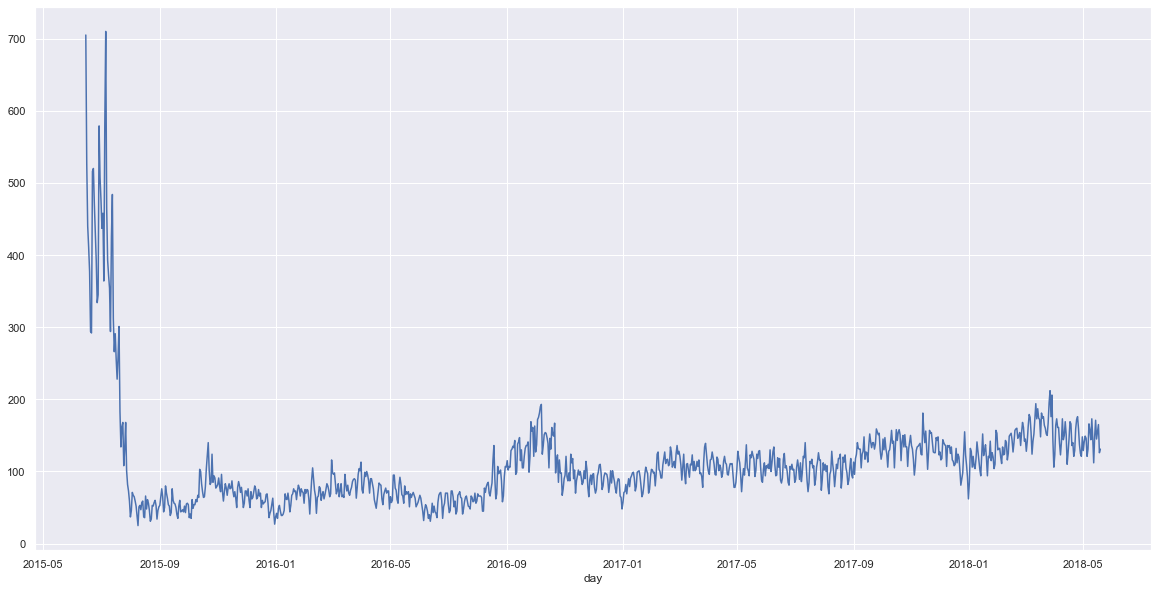

In [15]:
events_data.groupby('day').user_id.nunique().plot(figsize=(20,10))

In [16]:
events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0).reset_index().head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [17]:
users_events_data = events_data.pivot_table(index='user_id', 
                        columns='action', 
                        values='step_id', 
                        aggfunc='count', 
                        fill_value=0).reset_index()

In [18]:
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [19]:
submissions_data = pd.read_csv('submissions_data_train.zip')

In [20]:
users_scores = submissions_data.pivot_table(index='user_id',
                                           columns='submission_status',
                                           values='step_id',
                                           aggfunc='count',
                                           fill_value=0).reset_index()

In [21]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')

In [22]:
submissions_data['day'] = submissions_data.date.dt.date

In [23]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [24]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [25]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [26]:
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list).apply(np.diff).values

In [27]:
gap_data

array([array([], dtype=int32), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
          98252,    57019]),
       array([1567990]), array([], dtype=int32)], dtype=object)

In [28]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0))

In [29]:
gap_data = gap_data / (24 * 60 * 60)

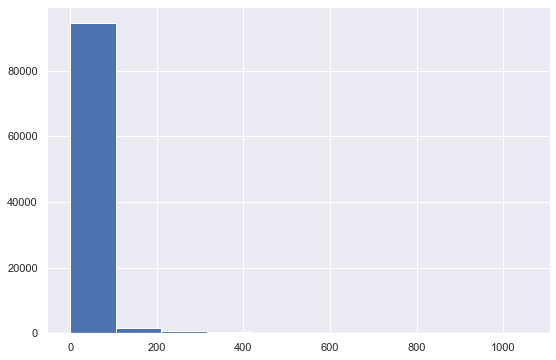

In [30]:
gap_data.hist()

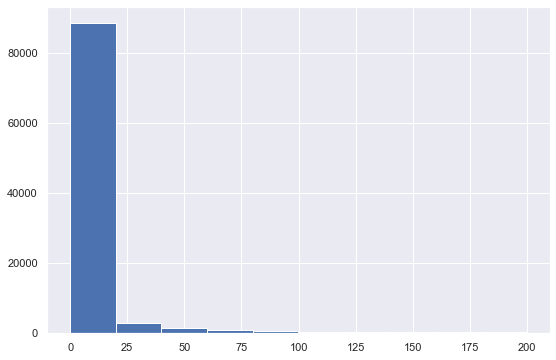

In [31]:
gap_data[gap_data < 200].hist()

In [32]:
gap_data.quantile(0.95)

59.760440972222156

In [33]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [34]:
events_data.pivot_table(index='user_id',
                        columns='action', 
                        values='step_id', 
                        aggfunc='count', fill_value=0).sort_values(['viewed'], ascending=False)

action,discovered,passed,started_attempt,viewed
user_id,,,,
20907,163,102,0,32778
10794,198,122,27,16089
25279,198,122,166,9693
1046,128,124,721,8122
3572,194,193,550,6968
...,...,...,...,...
18842,0,1,1,0
8773,0,0,1,0
13181,0,0,7,0


In [35]:
submissions_data.pivot_table(index='user_id',
                        columns='submission_status', 
                        values='step_id', 
                        aggfunc='count', fill_value=0).reset_index().sort_values(['correct'], ascending=False)

submission_status,user_id,correct,wrong
439,1046,421,513
2099,5552,186,93
6415,17135,168,177
2344,6183,142,65
3208,8461,135,42
...,...,...,...
551,1321,0,2
9778,26349,0,1
3559,9422,0,1
5014,13408,0,2


In [36]:
30 * 24 * 60 * 60

2592000

In [37]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [38]:
users_data = events_data.groupby('user_id', as_index=False).aggregate({'timestamp':'max'}) \
    .rename(columns={'timestamp':'last_timestamp'})

In [39]:
now = 1526772811
drop_out_threshold = 2592000

In [40]:
users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_threshold

In [41]:
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [42]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [43]:
users_data = users_data.merge(users_scores, on='user_id', how='outer')

In [44]:
users_data = users_data.fillna(0)

In [45]:
users_data.head(20)

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0
5,8,1481466913,True,9.0,21.0
6,9,1484999497,True,0.0,0.0
7,11,1526140625,False,0.0,0.0
8,14,1436368676,True,0.0,1.0
9,16,1513162585,True,77.0,106.0


In [46]:
users_data = users_data.merge(users_events_data, how='outer')

In [47]:
users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()

In [48]:
users_data = users_data.merge(users_days, how='outer')

In [49]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


In [50]:
users_data.user_id.nunique()

19234

In [51]:
events_data.user_id.nunique()

19234

In [52]:
users_data['passed_course'] = users_data.passed > 170

In [53]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1,False
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False


In [54]:
users_data.groupby('passed_course').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_course,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [55]:
users_data[users_data.passed_course].day.median()

20.0

In [56]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [57]:
user_min_time = events_data.groupby('user_id', as_index=False).aggregate({'timestamp':'min'}) \
    .rename({'timestamp':'min_timestamp'}, axis=1)

In [58]:
user_min_time.head()

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660


In [59]:
users_data = users_data.merge(user_min_time, how='outer')

In [60]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course,min_timestamp
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False,1472827464
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False,1514383364
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False,1434358476
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False,1466156809
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False,1521634660


In [61]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [62]:
events_data['user_time'] = events_data.user_id.map(str) + '_' + events_data.timestamp.map(str)

In [63]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,user_time
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895


In [64]:
learning_time_threshold = 3 * 24 * 60 * 60

In [65]:
learning_time_threshold

259200

In [66]:
user_min_time.head()

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660


In [67]:
user_learning_time_threshold = user_min_time.user_id.map(str) + '_' + (user_min_time.min_timestamp + learning_time_threshold).map(str)

In [68]:
user_learning_time_threshold.head()

0    1_1473086664
1    2_1514642564
2    3_1434617676
3    5_1466416009
4    7_1521893860
dtype: object

In [69]:
user_min_time['user_learning_time_threshold'] = user_learning_time_threshold

In [70]:
events_data = events_data.merge(user_min_time[['user_id', 'user_learning_time_threshold']], how='outer')

In [71]:
events_data.shape

(3480703, 8)

In [72]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048


In [73]:
events_data_train = events_data[events_data.user_time <= events_data.user_learning_time_threshold]

In [74]:
events_data_train.head()

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048


In [75]:
events_data_train.groupby('user_id').day.nunique()

user_id
1        1
2        1
3        1
5        1
7        1
        ..
26790    2
26793    1
26794    3
26797    1
26798    1
Name: day, Length: 19234, dtype: int64

In [76]:
events_data_train.groupby('user_id').day.nunique().max()

4

In [77]:
submissions_data['users_time'] = submissions_data.user_id.map(str) + '_' + submissions_data.timestamp.map(str)
submissions_data = submissions_data.merge(user_min_time[['user_id', 'user_learning_time_threshold']], how='outer')
submissions_data_train = submissions_data[submissions_data.users_time <= submissions_data.user_learning_time_threshold]
submissions_data_train.groupby('user_id').day.nunique().max()

4

In [78]:
X = submissions_data_train.groupby('user_id').day.nunique().to_frame().reset_index() \
    .rename(columns={'day':'days'})

In [79]:
X.head()

,user_id,days
0,2,1
1,3,1
2,8,1
3,14,1
4,16,3


In [80]:
steps_tried = submissions_data_train.groupby('user_id').step_id.nunique().to_frame().reset_index() \
    .rename(columns={'step_id':'steps_tried'})

In [81]:
steps_tried.head()

,user_id,steps_tried
0,2,2
1,3,4
2,8,11
3,14,1
4,16,23


In [82]:
X = X.merge(steps_tried, on='user_id', how='outer')

In [83]:
X.head()

,user_id,days,steps_tried
0,2,1,2
1,3,1,4
2,8,1,11
3,14,1,1
4,16,3,23


In [84]:
X.shape

(8913, 3)

In [85]:
X = X.merge(submissions_data_train.pivot_table(index='user_id',
                                              columns='submission_status',
                                              values='step_id',
                                              aggfunc='count',
                                              fill_value=0).reset_index())

In [86]:
X.head()

,user_id,days,steps_tried,correct,wrong
0,2,1,2,2,0
1,3,1,4,4,4
2,8,1,11,9,21
3,14,1,1,0,1
4,16,3,23,23,27


In [87]:
X['correct_ratio'] = X.correct / (X.correct + X.wrong)

In [88]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio
0,2,1,2,2,0,1.00
1,3,1,4,4,4,0.50
2,8,1,11,9,21,0.30
3,14,1,1,0,1,0.00
4,16,3,23,23,27,0.46


In [89]:
X = X.merge(events_data_train.pivot_table(index='user_id',
                                         columns='action',
                                         values='step_id',
                                         aggfunc='count',
                                         fill_value=0).reset_index()[['user_id', 'viewed']], how='outer')

In [90]:
X.shape

(19234, 7)

In [91]:
X = X.fillna(0)

In [92]:
X = X.merge(users_data[['user_id', 'passed_course', 'is_gone_user']], how='outer')

In [93]:
X = X[-((X.is_gone_user == False) & (X.passed_course == False))]

In [94]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed,passed_course,is_gone_user
0,2,1.0,2.0,2.0,0.0,1.00,9,False,True
1,3,1.0,4.0,4.0,4.0,0.50,20,False,True
2,8,1.0,11.0,9.0,21.0,0.30,154,False,True
3,14,1.0,1.0,0.0,1.0,0.00,9,False,True
4,16,3.0,23.0,23.0,27.0,0.46,132,True,True


In [95]:
y = X.passed_course.map(int)

In [96]:
X = X.drop(['passed_course', 'is_gone_user'], axis=1)

In [97]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed
0,2,1.0,2.0,2.0,0.0,1.00,9
1,3,1.0,4.0,4.0,4.0,0.50,20
2,8,1.0,11.0,9.0,21.0,0.30,154
3,14,1.0,1.0,0.0,1.0,0.00,9
4,16,3.0,23.0,23.0,27.0,0.46,132


In [98]:
X = X.set_index(X.user_id)
X = X.drop('user_id', axis=1)

In [99]:
X.head()

,days,steps_tried,correct,wrong,correct_ratio,viewed
user_id,,,,,,
2,1.0,2.0,2.0,0.0,1.00,9
3,1.0,4.0,4.0,4.0,0.50,20
8,1.0,11.0,9.0,21.0,0.30,154
14,1.0,1.0,0.0,1.0,0.00,9
16,3.0,23.0,23.0,27.0,0.46,132


In [100]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score

In [101]:
clf = LogisticRegressionCV(cv=5)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [103]:
clf.fit(X_train, y_train)

LogisticRegressionCV(cv=5)

In [104]:
clf.score(X_test, y_test)

0.926605504587156

In [105]:
predicts = clf.predict(X_test)

In [106]:
clf.coef_

array([[ 6.09288349e-01, -3.90169896e-02,  9.76827079e-02,
         5.52748971e-03,  9.75696250e-01, -9.51796214e-04]])

In [107]:
clf.intercept_

array([-4.05640232])

In [108]:
cross_val_score(clf, X_train, y_train, cv=4).mean()

0.9218098415346122

In [109]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [111]:
dt = DecisionTreeClassifier(criterion='entropy')

In [112]:
parameters = {'max_depth':range(3, 6), 'max_leaf_nodes':range(6, 15), 'min_samples_leaf':range(1, 4),
             'min_samples_split':range(2, 5)}

In [113]:
grid_search_cv_clf = GridSearchCV(dt,parameters,cv=4)

In [114]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': range(3, 6),
                         'max_leaf_nodes': range(6, 15),
                         'min_samples_leaf': range(1, 4),
                         'min_samples_split': range(2, 5)})

In [115]:
model = grid_search_cv_clf.best_estimator_

In [116]:
y_pred = model.predict(X_test)

In [117]:
recall_score(y_test, y_pred)

0.16101694915254236

In [118]:
precision_score(y_test, y_pred)

0.4318181818181818

In [119]:
grid_search_cv_clf.best_params_, cross_val_score(model,X_train,y_train,cv=4).mean()

({'max_depth': 5,
  'max_leaf_nodes': 11,
  'min_samples_leaf': 1,
  'min_samples_split': 3},
 0.9186127328329163)

In [120]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score

In [121]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [122]:
knn = KNeighborsClassifier()

In [123]:
parameters = {'n_neighbors': range(15,25), 'leaf_size':range(1,7)}

In [124]:
grid_search_cv_clf = GridSearchCV(knn,parameters,cv=4,n_jobs=-1)

In [125]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': range(1, 7),
                         'n_neighbors': range(15, 25)})

In [126]:
model = grid_search_cv_clf.best_estimator_

In [127]:
y_pred = model.predict(X_test)

In [128]:
recall_score(y_test, y_pred)

0.11440677966101695

In [129]:
precision_score(y_test, y_pred)

0.35526315789473684

In [130]:
grid_search_cv_clf.best_params_, cross_val_score(model, X_train, y_train, cv=4).mean()

({'leaf_size': 1, 'n_neighbors': 19}, 0.9194467611898804)

In [131]:
from sklearn.metrics import roc_auc_score

In [132]:
roc_auc_score(y_test, y_pred)

0.5499138926570482